In [ ]:
#importa biblioteca
import pandas as pd 
import numpy as np

In [ ]:
#importa dados
dataframe = pd.read_csv('/content/train.csv', sep=',')


In [ ]:
#traz a quantidade de linhas e colunas
dataframe.shape

dataframe['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [ ]:
#mostra as 5 primeiras linhas
dataframe.head()

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Análise Exploratória

In [ ]:
#Trazer informação das colunas
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         6499 non-null   object 
 1   Gender             6499 non-null   int64  
 2   Senior Citizen     6499 non-null   int64  
 3   Partner            6499 non-null   object 
 4   Dependents         6499 non-null   object 
 5   Tenure             6499 non-null   int64  
 6   Phone Service      6499 non-null   object 
 7   Multiple Lines     6499 non-null   object 
 8   Internet Service   6499 non-null   object 
 9   Online Security    6499 non-null   object 
 10  Online Backup      6499 non-null   object 
 11  Device Protection  6499 non-null   object 
 12  Tech Support       6499 non-null   object 
 13  Streaming TV       6499 non-null   object 
 14  Streaming Movies   6499 non-null   object 
 15  Contract           6499 non-null   object 
 16  Paperless Billing  6499 

In [ ]:
#traz informações como contagem, media, minimo,  1/4 1/2 3/4 maximo
dataframe.describe()

,Gender,Senior Citizen,Tenure,Monthly Charges,Total Charges
count,6499.000000,6499.000000,6499.000000,6499.000000,6490.000000
mean,0.506232,0.162487,32.369134,64.733344,2282.935177
std,0.500000,0.368925,24.584693,30.136193,2270.034922
min,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,0.000000,9.000000,35.400000,399.300000
50%,1.000000,0.000000,29.000000,70.350000,1397.100000
75%,1.000000,0.000000,55.000000,89.850000,3786.612500
max,1.000000,1.000000,72.000000,118.750000,8684.800000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9595598110>,
      dtype=object)

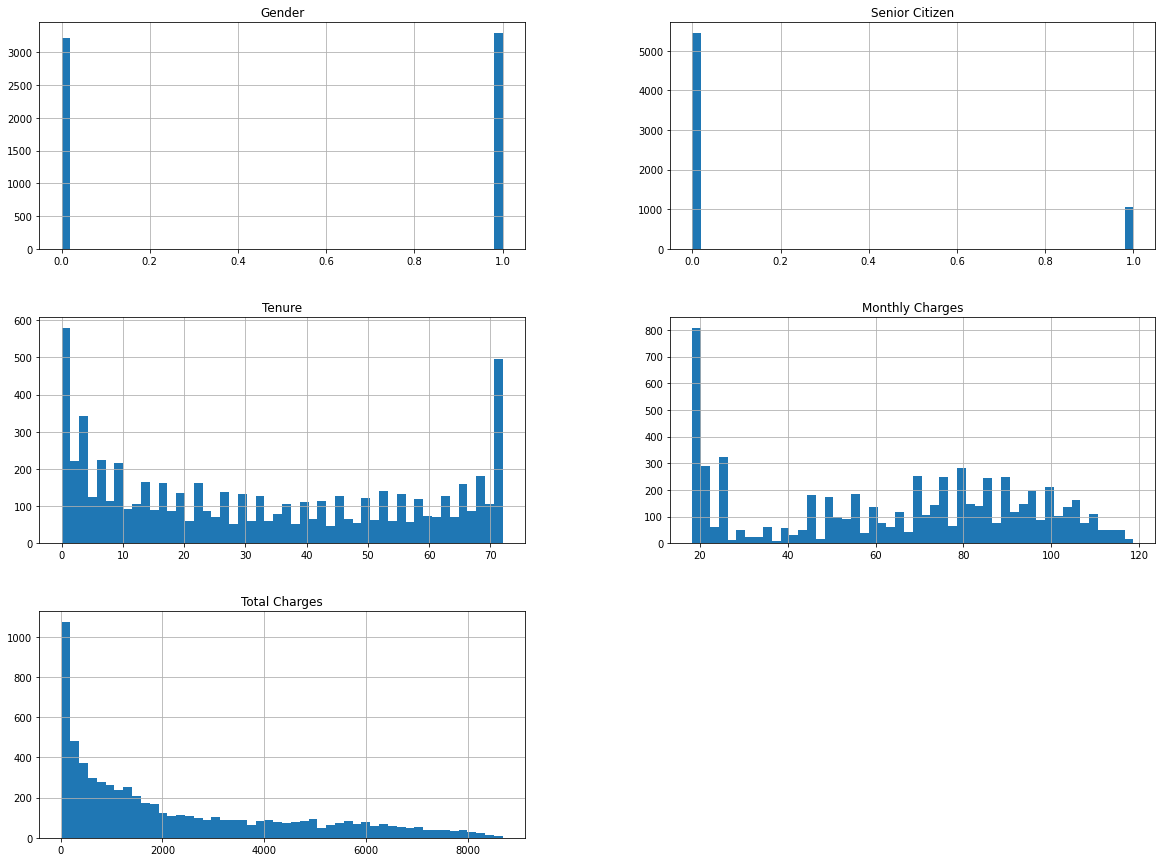

In [ ]:
#Histograma dos atributos numericos
dataframe.hist(bins=50, figsize=(20,15))



In [ ]:
#Coeficiente de correlação
dataframe.corr()

,Gender,Senior Citizen,Tenure,Monthly Charges,Total Charges
Gender,1.000000,0.001184,0.009096,-0.012448,0.003193
Senior Citizen,0.001184,1.000000,0.015732,0.220096,0.102562
Tenure,0.009096,0.015732,1.000000,0.248949,0.825554
Monthly Charges,-0.012448,0.220096,0.248949,1.000000,0.651688
Total Charges,0.003193,0.102562,0.825554,0.651688,1.000000


## Limpeza dos dados

In [ ]:
#Somar nulos
dataframe.isnull().sum()

CustomerID           0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        9
Churn                0
dtype: int64

In [ ]:
#substituir espaço por "_"
dataframe.columns = dataframe.columns.str.replace(' ', '_')


In [ ]:

#Limpeza de nulos


df=dataframe

df.dropna(subset=['Total_Charges' ], inplace=True)

#Converter texto em binario
df['Gender'] = np.where(df.Gender	 == 'Yes',1,0)
df['Senior_Citizen'] = np.where(df.Senior_Citizen	 == 'Yes',1,0)
df['Partner'] = np.where(df.Partner == 'Yes',1,0)
df['Phone_Service'] = np.where(df.Phone_Service == 'No phone service',0,
                      np.where(df.Phone_Service == 'No',1,2))

df['Internet_Service'] = np.where(df.Internet_Service == 'DSL',0,
                      np.where(df.Internet_Service == 'Fiber optic',1,2))  


df['Churn'] = np.where(df.Churn == 'Yes',1,0)


df['Dependents'] = np.where(df.Dependents == 'Yes',1,0)

df['Multiple_Lines'] = np.where(df.Multiple_Lines == 'Yes',1,0)
df['Online_Security'] = np.where(df.Online_Security == 'Yes',1,0)
df['Device_Protection'] = np.where(df.Device_Protection == 'Yes',1,0)
df['Tech_Support'] = np.where(df.Tech_Support == 'Yes',1,0)


df['Tenure'] = np.where(df.Tenure	 == 'Yes',1,0)

df['Online_Backup'] = np.where(df.Online_Backup	 == 'Yes',1,0)


df['Streaming_Movies'] = np.where(df.Streaming_Movies == 'Yes',1,0)
df['Contract'] = np.where(df.Contract == 'Yes',1,0)
df['Paperless_Billing'] = np.where(df.Paperless_Billing == 'Yes',1,0)




df['Payment_Method'] = np.where(df.Payment_Method == 'Electronic check',0,
                      np.where(df.Payment_Method == 'Mailed check',1,
                      np.where(df.Payment_Method == 'Bank transfer (automatic)',2,        
                     np.where(df.Payment_Method ==  'Credit card (automatic)',3,4))))  
      

#Converter para numero inteiro
df['Monthly_Charges'] = df['Monthly_Charges'].astype(np.int64)
df['Total_Charges'] = df['Total_Charges'].astype(np.int64)

## Extração de características

In [ ]:
#definição das caracteristicas
X=df.drop(columns=['CustomerID','Partner','Dependents','Churn','Tenure','Multiple_Lines','Online_Security','Churn','Online_Backup','Device_Protection','Paperless_Billing','Monthly_Charges','Total_Charges', 'Internet_Service','Streaming_TV'])
y = df['Churn']

In [ ]:
#Trazer informação das colunas
X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6490 entries, 0 to 6498
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Gender            6490 non-null   int64
 1   Senior_Citizen    6490 non-null   int64
 2   Phone_Service     6490 non-null   int64
 3   Tech_Support      6490 non-null   int64
 4   Streaming_Movies  6490 non-null   int64
 5   Contract          6490 non-null   int64
 6   Payment_Method    6490 non-null   int64
dtypes: int64(7)
memory usage: 405.6 KB


,Gender,Senior_Citizen,Phone_Service,Tech_Support,Streaming_Movies,Contract,Payment_Method
0,0,0,1,0,0,0,0
1,0,0,2,0,0,0,1
2,0,0,2,0,0,0,1
3,0,0,1,1,0,0,2
4,0,0,2,0,0,0,0


## Treinamento do modelo

In [ ]:
#dividu a base de teste em 20% dos dados
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [ ]:
#utilizamos o algoritmo de floresta randomica
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0) 
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

In [ ]:
classificador = RandomForestClassifier(class_weight='balanced')

In [ ]:
classificador.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

## Avaliação do modelo

In [ ]:
resultado = classificador.predict(X_test)

In [ ]:
resultado

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(y_test, resultado))

              precision    recall  f1-score   support

           0       0.87      0.65      0.75       970
           1       0.41      0.72      0.52       328

    accuracy                           0.67      1298
   macro avg       0.64      0.69      0.64      1298
weighted avg       0.76      0.67      0.69      1298



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
#matriz de confusão
confusion_matrix(y_test, resultado)

array([[633, 337],
       [ 92, 236]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, resultado).ravel()
print(tn, fp, fn, tp)

633 337 92 236


In [ ]:
#acuracia
acuracia = (tp + tn)/ (tp + tn + fp + fn)
print(round(acuracia, 2))

0.67


In [ ]:
import pickle

# save the model to disk
import cloudpickle
model = cloudpickle.dumps(classificador)
with open('model.pkl', 'wb') as file_out:
  file_out.write(model)
 
# some time later...
 
# load the model from disk
#loaded_model = pickle.load(open(model.pkl, 'rb'))
#result = loaded_model.score(X_test, y_test)
#print(result)